In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

In [3]:
titanic_df = pd.read_csv("train.csv")

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


First some basic questions:

1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2.) What deck were the passengers on and how does that relate to their class?
3.) Where did the passengers come from?
4.) Who was alone and who was with family?

Then a broader question:

5.) What factors helped someone survive the sinking?
So let's start with the first question: Who were the passengers on the titanic?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

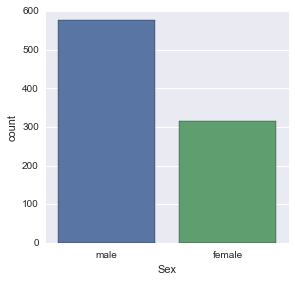

In [12]:
sns.factorplot('Sex',data=titanic_df,kind='count')

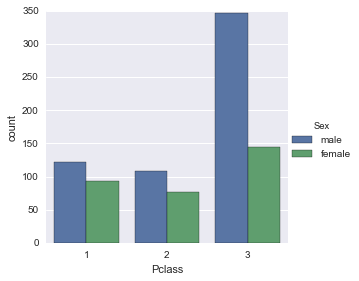

In [14]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [17]:
def MaleFemaleOrChild(passenger):
    age,sex = passenger
    if age < 16:
        return "child"
    else:
        return sex
    

In [20]:
titanic_df['person'] = titanic_df[["Age","Sex"]].apply(MaleFemaleOrChild,axis=1)

In [21]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,child


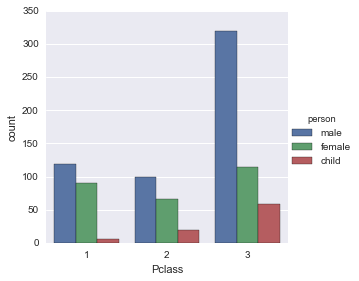

In [23]:
sns.factorplot("Pclass",data=titanic_df,hue="person",kind="count")

Let's try histogram for better understanding of children, male and female distribution in Titanic.

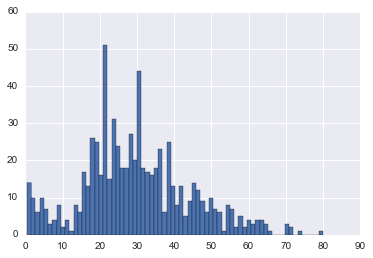

In [24]:
titanic_df['Age'].hist(bins=70)

Let's find out mean of "Age" in Titanic !

In [25]:
titanic_df['Age'].mean()

29.69911764705882

In [26]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

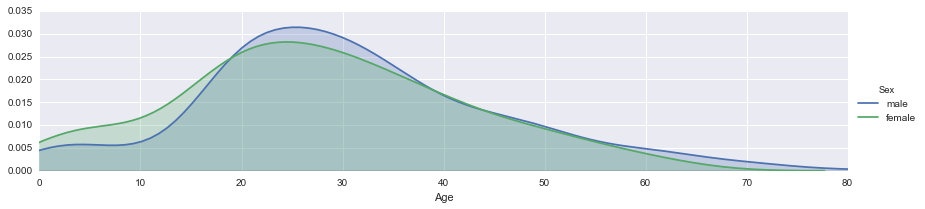

In [29]:
figure = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

figure.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()
figure.set(xlim=(0,oldest))
figure.add_legend()
           

Output Shows KDE plot for male and female. We already created "Person" data for chidrens. Let's try KDE plot for male, female and children.

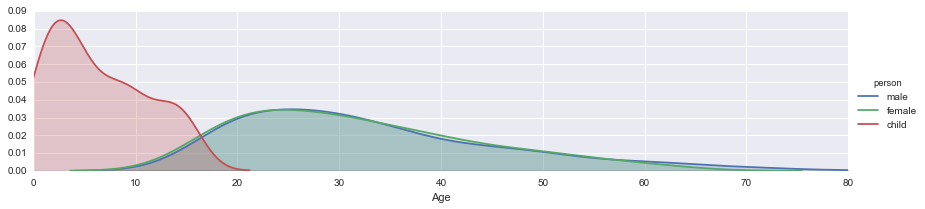

In [30]:
figure = sns.FacetGrid(titanic_df,hue='person',aspect=4)

figure.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

Let's try plot for "Pclass" and look at the output.

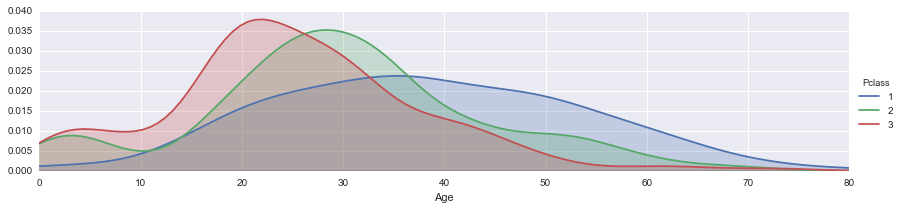

In [31]:
figure = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

figure.map(sns.kdeplot,"Age",shade=True)

oldest = titanic_df["Age"].max()
figure.set(xlim=(0,oldest))
figure.add_legend()

We can clearly see that most of the people between age 20 to 30 were in 3rd class.
Same goes for 2nd class, but age ratio is different( 25 to 35).

Now, let's look at the titanic data again to answer some more questions.

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


Let's try to figure out and visualize "Cabin" data. First, let's drop NaN values from the "Cabin" data.

In [33]:
cabin = titanic_df["Cabin"].dropna()

Let's check the value and make sure it works.

In [34]:
cabin.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Perfect! Let's play with some data now!

Let's try to getting the first letter or level in the "cabin" data. Example, "C85" represents level "C". No puns intendend.


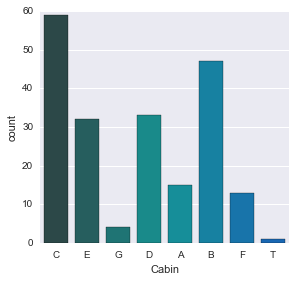

In [44]:
cabin_level = []
for level in cabin:
    cabin_level.append(level[0])
    
    
cabin_df = DataFrame(cabin_level)
cabin_df.columns = ["Cabin"]
sns.factorplot("Cabin",kind="count",data=cabin_df,palette="winter_d")

Value of "T" in Cabin does not make sense, so let's drop that and re-plot it.

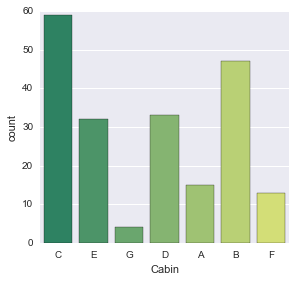

In [46]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]
#Let's try Summer in palette
sns.factorplot("Cabin",kind="count",data=cabin_df,palette="summer")

We have answered questions 1 & 2, so now let's move on to question
3.) Where did the passengers come from?

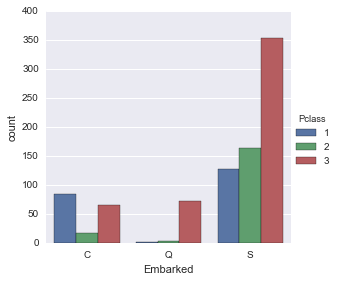

In [48]:
sns.factorplot("Embarked",data=titanic_df,hue="Pclass",x_order=["C","Q","S"],kind="count")

embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
Intresting to point out that:                
Queenstown has mostly 3rd class passengers and barely 1st/2nd class passengers.
Cherbourg is the only embarked port where they have more 1st class passengers compared to 2nd and 3rd class passengers.

In [50]:
#Let's move to question 4
#4.) Who was alone and who was with family?

In [51]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,male


In [52]:
#We have Sib SP and Parch columns. Let's add them together to make it more clear.


In [53]:
titanic_df["Alone"] = titanic_df["SibSp"] + titanic_df["Parch"]

In [54]:
titanic_df["Alone"]

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, dtype: int64

Anything except 0 had some sort of family member with them on Titanic.